In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

#C:\workspaces\AnjutkaVideo\Kara_Sea_Crab_Video_st_5993_2018\V6__R_20180915_212238

#video_filename="V5__R_20180915_211343"
#input_filename=video_filename+"_drifts15.csv"

video_filename="V3__R_20180915_205551"

directory="C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video_st_5993_2018/"+video_filename+"/"

input_filename=video_filename+"_drifts.csv"

input_filepath=directory+"/"+input_filename

#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V1_R_20180911_165259_drifts14.csv",delimiter="\t",na_values="(null)") #
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V1_R_20180911_165259_drifts12.csv",delimiter="\t",na_values="(null)") #244 errors
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V2_R_20180911_165730_drifts12.csv",delimiter="\t",na_values="(null)") #4 errors
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V3_R_20180911_170159_drifts14.csv",delimiter="\t",na_values="(null)") #no errors
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V3_R_20180916_012323_drifts12.csv",delimiter="\t",na_values="(null)") #no errors left
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V6__R_20180915_212238_drifts11.csv",delimiter="\t",na_values="(null)") #11 errors
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V5__R_20180915_211343_drifts11.csv",delimiter="\t",na_values="(null)") # 24 errors
data = pd.read_csv(input_filepath,delimiter="\t",na_values="(null)") # 24 errors

#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V4__R_20180915_210447_drifts11.csv",delimiter="\t",na_values="(null)") # no errors
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V3__R_20180915_205551_drifts11.csv",delimiter="\t",na_values="(null)") #13 errors
#data = pd.read_csv("C:/workspaces/AnjutkaVideo/V3__R_20180915_205551_drifts15.csv",delimiter="\t",na_values="(null)")


In [3]:
#data.head(30)

In [4]:
#data.dtypes
data['driftY_orig']=data['driftY']

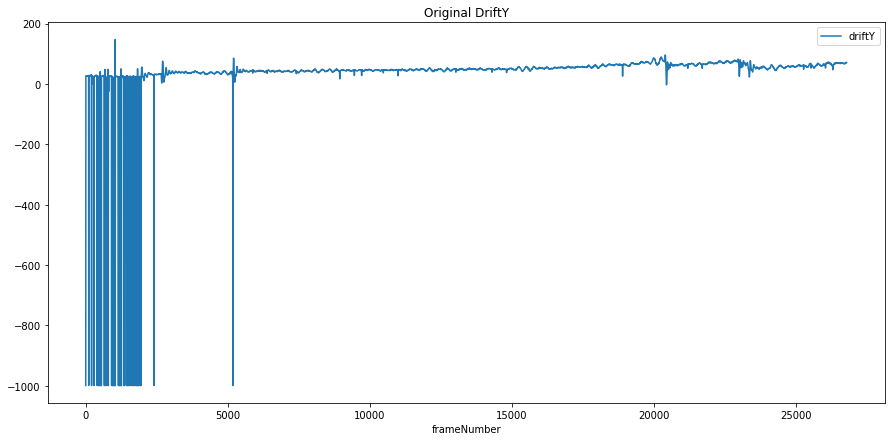

In [5]:
data.plot(x='frameNumber', y='driftY',figsize=(15,7), title="Original DriftY")

In [6]:
data.loc[data['driftY'] < -30].count()[0]

73

In [7]:
#Correct "single outliers" (where prev and next data points are not outliers)
def replaceOutlierBetweenTwo():
    prevY=data['driftY'].shift(periods=1)
    nextY=data['driftY'].shift(periods=-1)
    diffNextPrevY=abs(prevY - nextY)
    meanY=(nextY+prevY)/2
    deviationY = abs(data['driftY']-meanY)
    single_outlier = (deviationY >30) & (diffNextPrevY <30)
    data['driftY'] = data['driftY'].mask(single_outlier, meanY)

In [8]:
#data.loc[data['driftY'] != data['driftY_orig']].head(10) 

44

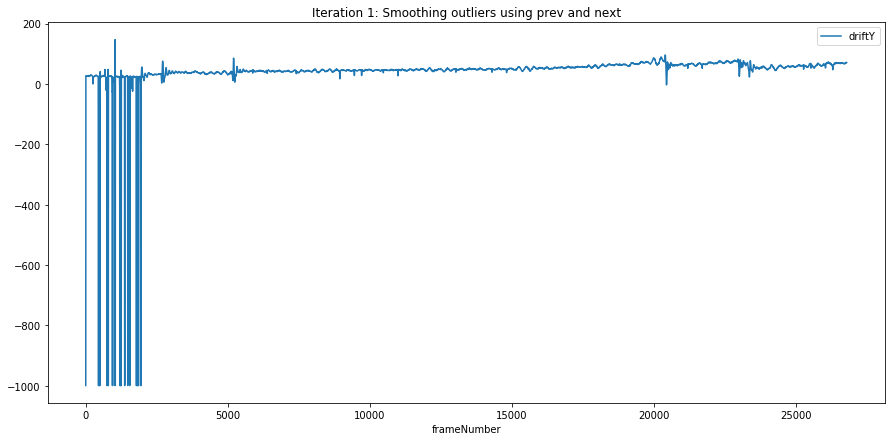

In [9]:
replaceOutlierBetweenTwo()
#data.loc[data['frameNumber'] > 4900].loc[data['frameNumber'] < 5860].plot(kind='bar', x='frameNumber', y='driftY_corrected',figsize=(15,7))
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title="Iteration 1: Smoothing outliers using prev and next")
data.loc[data['driftY'] < -30].count()[0]

In [10]:
#data.loc[data['single_outlier'] == True]

#data['driftY_corrected'] = data['driftY']
def replaceIfThirdIsOutlier():
    
    outlierThreshold = 70
    normalJump = 10
    
    prevPrevY=data['driftY'].shift(periods=2)
    nextNextY=data['driftY'].shift(periods=-2)
    prevY=data['driftY'].shift(periods=1)
    nextY=data['driftY'].shift(periods=-1)

    meanY=(prevPrevY + prevY)/2
    deviationY = abs(data['driftY']-meanY)

    diffPrevsY=prevY-prevPrevY

    
    #outlier_fromPrevs = (deviationY > outlierThreshold) & (abs(diffPrevsY) < normalJump)
    outlier_fromPrevs = (prevPrevY>-10) & (prevY>-10) & (deviationY > outlierThreshold) & (abs(diffPrevsY) < normalJump)
    data['driftY'] = data['driftY'].mask(outlier_fromPrevs, prevY+diffPrevsY)

In [11]:
replaceIfThirdIsOutlier()

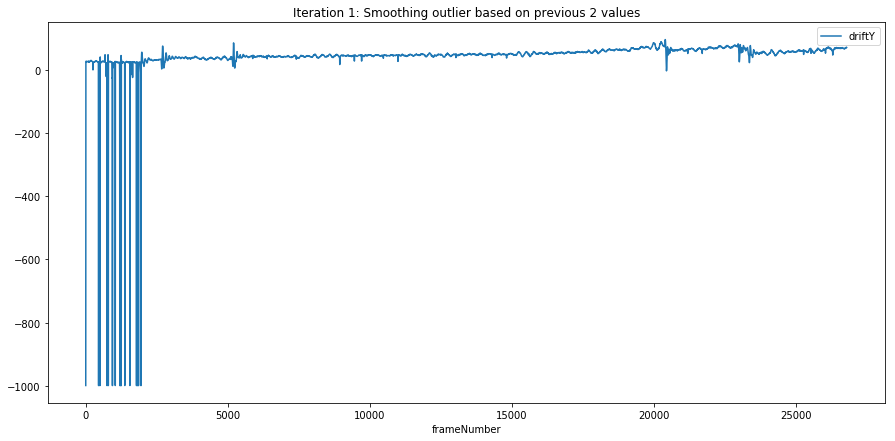

In [12]:
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title ="Iteration 1: Smoothing outlier based on previous 2 values")

In [13]:
data.loc[data['driftY'] < -30].count()[0]

33

23

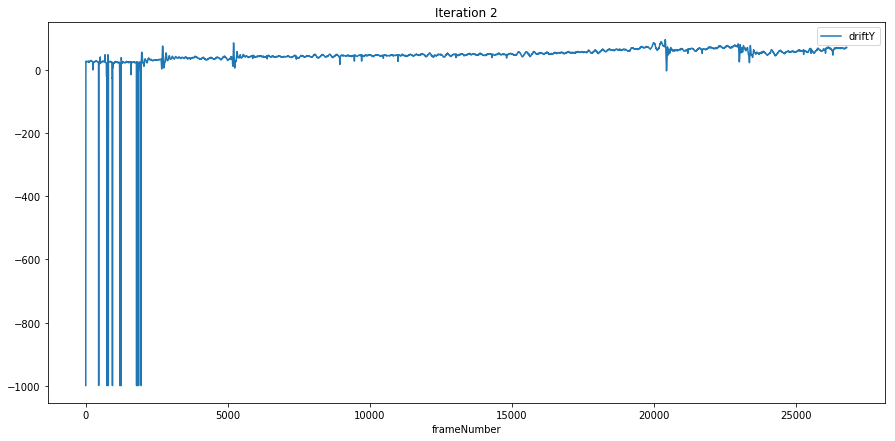

In [14]:
replaceOutlierBetweenTwo()
replaceIfThirdIsOutlier()
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title ="Iteration 2")
data.loc[data['driftY'] < -30].count()[0]

19

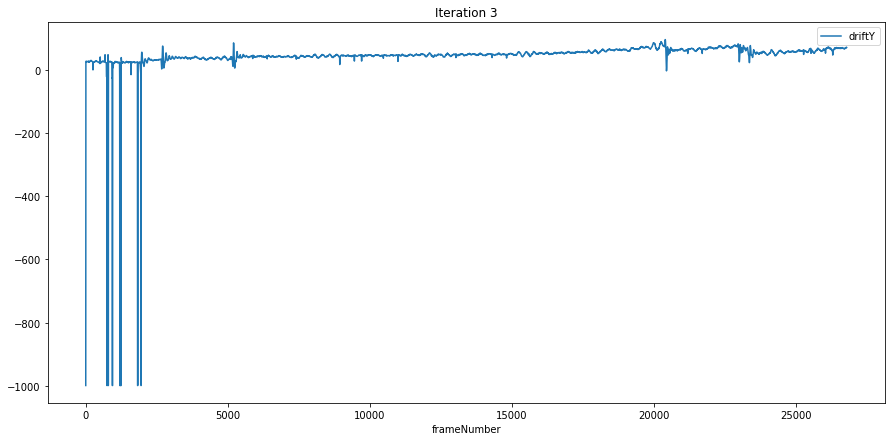

In [15]:
replaceOutlierBetweenTwo()
replaceIfThirdIsOutlier()
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title ="Iteration 3")
data.loc[data['driftY'] < -30].count()[0]

18

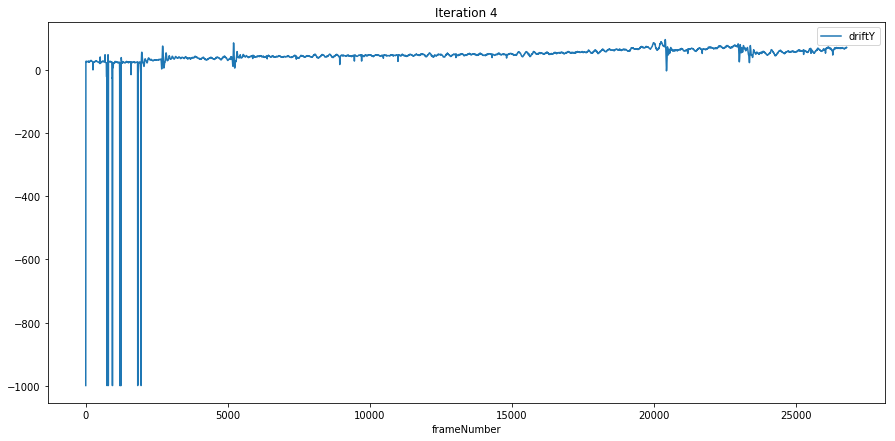

In [16]:
replaceOutlierBetweenTwo()
replaceIfThirdIsOutlier()
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title="Iteration 4")
data.loc[data['driftY'] < -30].count()[0]

17

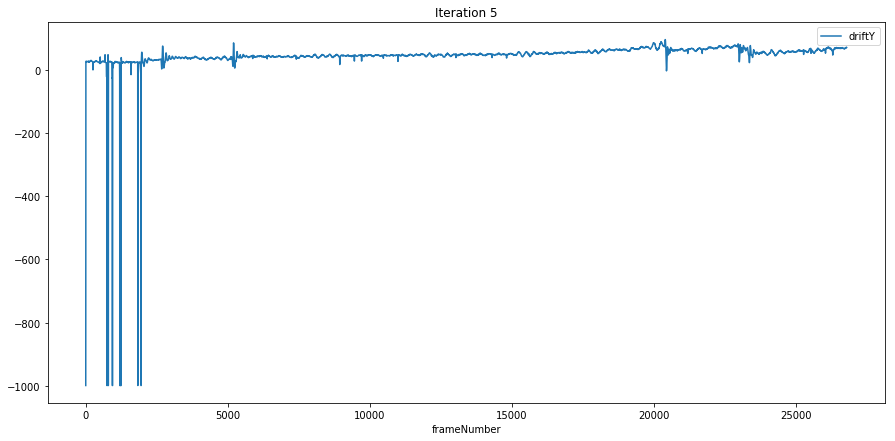

In [17]:
replaceOutlierBetweenTwo()
replaceIfThirdIsOutlier()
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title="Iteration 5")
data.loc[data['driftY'] < -30].count()[0]

16

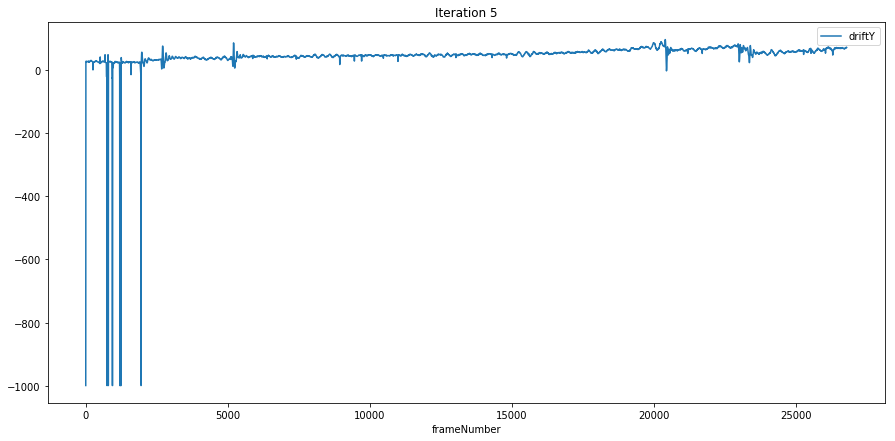

In [22]:
replaceOutlierBetweenTwo()
replaceIfThirdIsOutlier()
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title="Iteration 5")
data.loc[data['driftY'] < -30].count()[0]

16

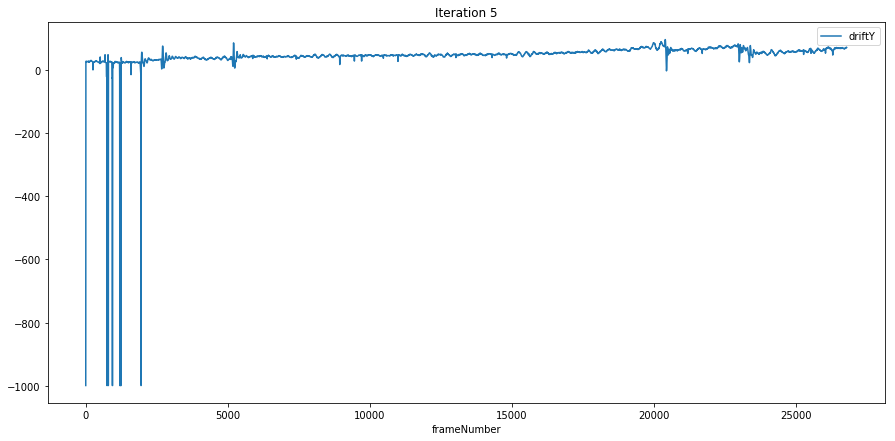

In [24]:
replaceOutlierBetweenTwo()
replaceIfThirdIsOutlier()
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title="Iteration 5")
data.loc[data['driftY'] < -30].count()[0]

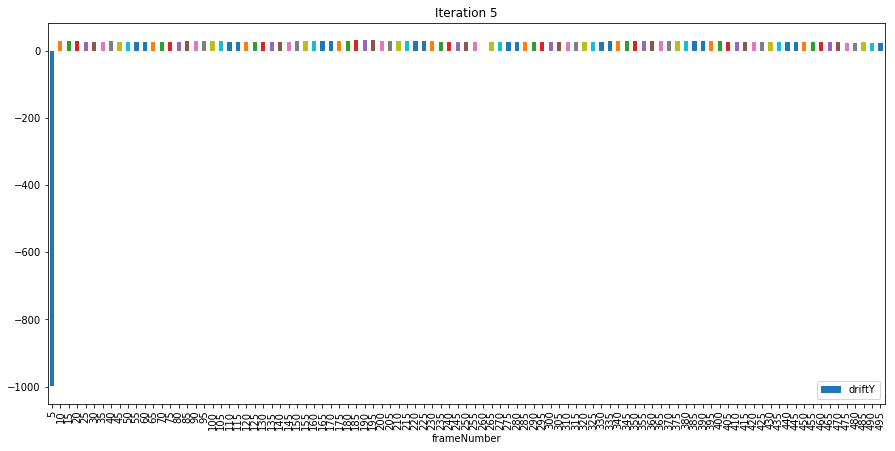

In [18]:
data.loc[data['frameNumber'] > 0].loc[data['frameNumber'] < 500].plot(kind="bar", x='frameNumber', y='driftY',figsize=(15,7), title="Iteration 5")

In [19]:
data.loc[data['frameNumber'] > 5350].loc[data['frameNumber'] < 5460].head(100)

,frameNumber,driftX,driftY,driftDistance,driftAngle,driftsCountNoOutliers,driftsCount,drifts,driftsNoOutliers,outlier,driftY_orig
1070,5355,-9.0,44.5,45.749096,-79.613873,4,4,"['(-1,42)', '(-12,44)', '(-9,45)', '(-9,46)']","['(-1,42)', '(-12,44)', '(-9,45)', '(-9,46)']",NaN,44.5
1071,5360,-10.0,41.0,43.011626,-78.690068,5,5,"['(-2,39)', '(-13,41)', '(-10,42)', '(-15,40)'...","['(-2,39)', '(-13,41)', '(-10,42)', '(-15,40)'...",NaN,41.0
1072,5365,-11.0,40.0,42.379240,-75.963757,5,5,"['(-4,38)', '(-14,40)', '(-11,40)', '(-17,39)'...","['(-4,38)', '(-14,40)', '(-11,40)', '(-17,39)'...",NaN,40.0
1073,5370,-12.0,39.0,41.761226,-75.963757,5,5,"['(-6,39)', '(-14,39)', '(-12,40)', '(-16,39)'...","['(-6,39)', '(-14,39)', '(-12,40)', '(-16,39)'...",NaN,39.0
1074,5375,-12.0,40.0,41.761226,-75.963757,5,5,"['(-8,40)', '(-14,39)', '(-12,40)', '(-15,39)'...","['(-8,40)', '(-14,39)', '(-12,40)', '(-15,39)'...",NaN,40.0
1075,5380,-12.5,41.0,42.584995,-75.963757,4,4,"['(-11,41)', '(-13,41)', '(-13,40)', '(-12,41)']","['(-11,41)', '(-13,41)', '(-13,40)', '(-12,41)']",NaN,41.0
1076,5385,-12.0,40.5,42.102478,-75.963757,4,4,"['(-12,42)', '(-13,39)', '(-12,41)', '(-11,40)']","['(-12,42)', '(-13,39)', '(-12,41)', '(-11,40)']",NaN,40.5
1077,5390,-11.0,41.0,42.449971,-75.963757,5,5,"['(-12,42)', '(-11,40)', '(-11,41)', '(-9,40)'...","['(-12,42)', '(-11,40)', '(-11,41)', '(-9,40)'...",NaN,41.0
1078,5395,-9.5,40.5,41.600948,-78.690068,4,4,"['(-10,41)', '(-9,40)', '(-6,38)', '(-10,41)']","['(-10,41)', '(-9,40)', '(-6,38)', '(-10,41)']",NaN,40.5
1079,5400,-8.0,39.5,40.302107,-78.690068,4,4,"['(-9,40)', '(-8,39)', '(-8,38)', '(-8,40)']","['(-9,40)', '(-8,39)', '(-8,38)', '(-8,40)']",NaN,39.5


In [20]:
output_filename=video_filename+"_toCut.csv"
output_filepath=directory+"/"+output_filename
print(output_filepath)

C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video_st_5993_2018/V6__R_20180915_212238//V6__R_20180915_212238_toCut.csv


In [25]:
data.to_csv(output_filepath, sep='\t')

0

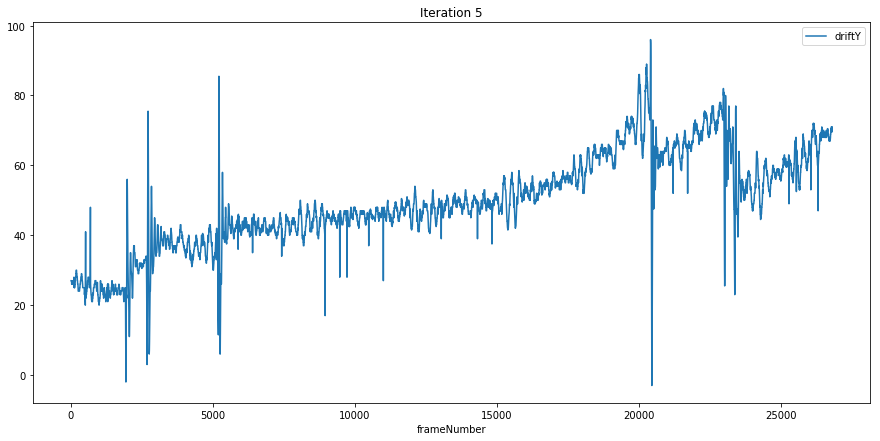

In [26]:
data = pd.read_csv(output_filepath,delimiter="\t",na_values="(null)") # 24 errors
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title="Iteration 5")
data.loc[data['driftY'] < -30].count()[0]